In [69]:
# importing all necessary packages/Libraries:
import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from pandas_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [70]:
# Now we can read the File by using pandas liberabry:
df_score=pd.read_csv("Happines_Score.csv")

In [71]:
df_score.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Here the target label is Happiness score and rest of the columns is the features that will be contributing towards the label prediction.

However I find the categorical columns useless and the Happiness Rank is just a list of numbers so they do not seem to be playing any important role in the Happiness Score evaluation. We will analyze further to see if my hunch is indeed correct and we will drop any column that prove to be not contributing towards the label prediction.

Since our label is a continous data this is going to be a Regression problem!

In [72]:
df_score.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [73]:
df_score.shape

(158, 12)

This shows the total number of rows is 158  and 12 columns  .

In [74]:
df_score.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This shows that no columns in the given dataset has null values.

In [75]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Here the columns Country and Region are catogrical values that can be converted to the numerical values but we no need to consider this in skewness.

In [76]:
df_score.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Here we get the insights of the numerical datas by leaving the catogirical datas . we can see mean,median,min,max,count etc..

In [77]:
df_score.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

From this we can see that Happiness Score is the label/output column and rest of the columns are the features 'Country', 'Region', 'Happiness Rank','Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual'

# Dropping categorical data that are not contributing to the label prediction:

In [78]:
df_score_New=df_score.drop(['Country','Region','Happiness Rank'],axis=1)

Here we have dropped the coloumns using drop command.

# Visualizing the data:
    

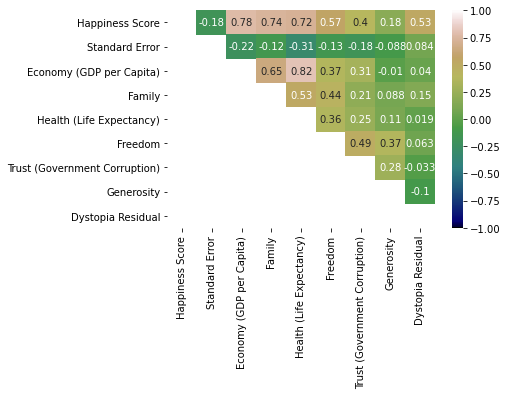

In [79]:
upper_triangel=np.tril(df_score_New.corr())
sns.heatmap(df_score_New.corr(),vmin=-1,vmax=1,annot=True,annot_kws={'size':10},cmap='gist_earth',mask=upper_triangel)
plt.show()

From the above graph we can able to check the correlation between the happiness Score with other feature columns. No dark boxex are present which represent that somewhat all these columns are contributing to the prediction of the Label.

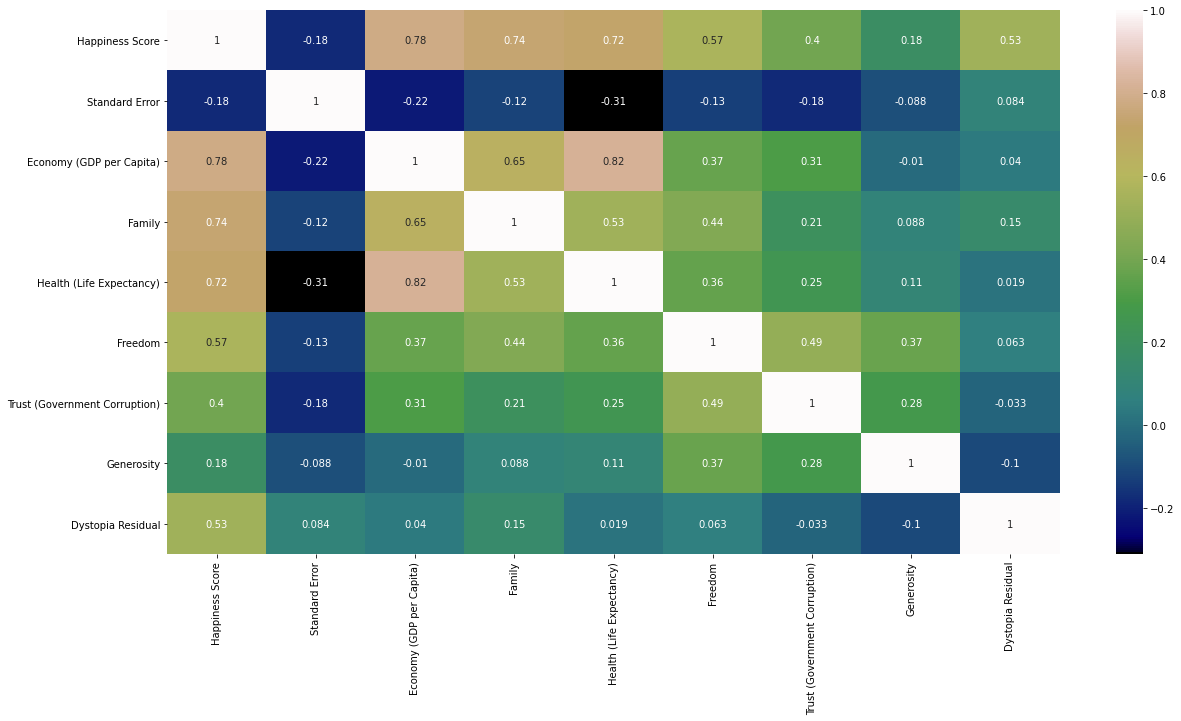

In [80]:
corr_hmap=df_score_New.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True,cmap='gist_earth')
plt.show()

HeatMap Observations:
1. Happiness Score is in drak blue in color with Standard Error that indicates that they are negatively correlated to each other.
2. The dark black colors indicate that they are very high negatively correlated to each other.
3. the Light colors indicate the positive correlation between the two columns.

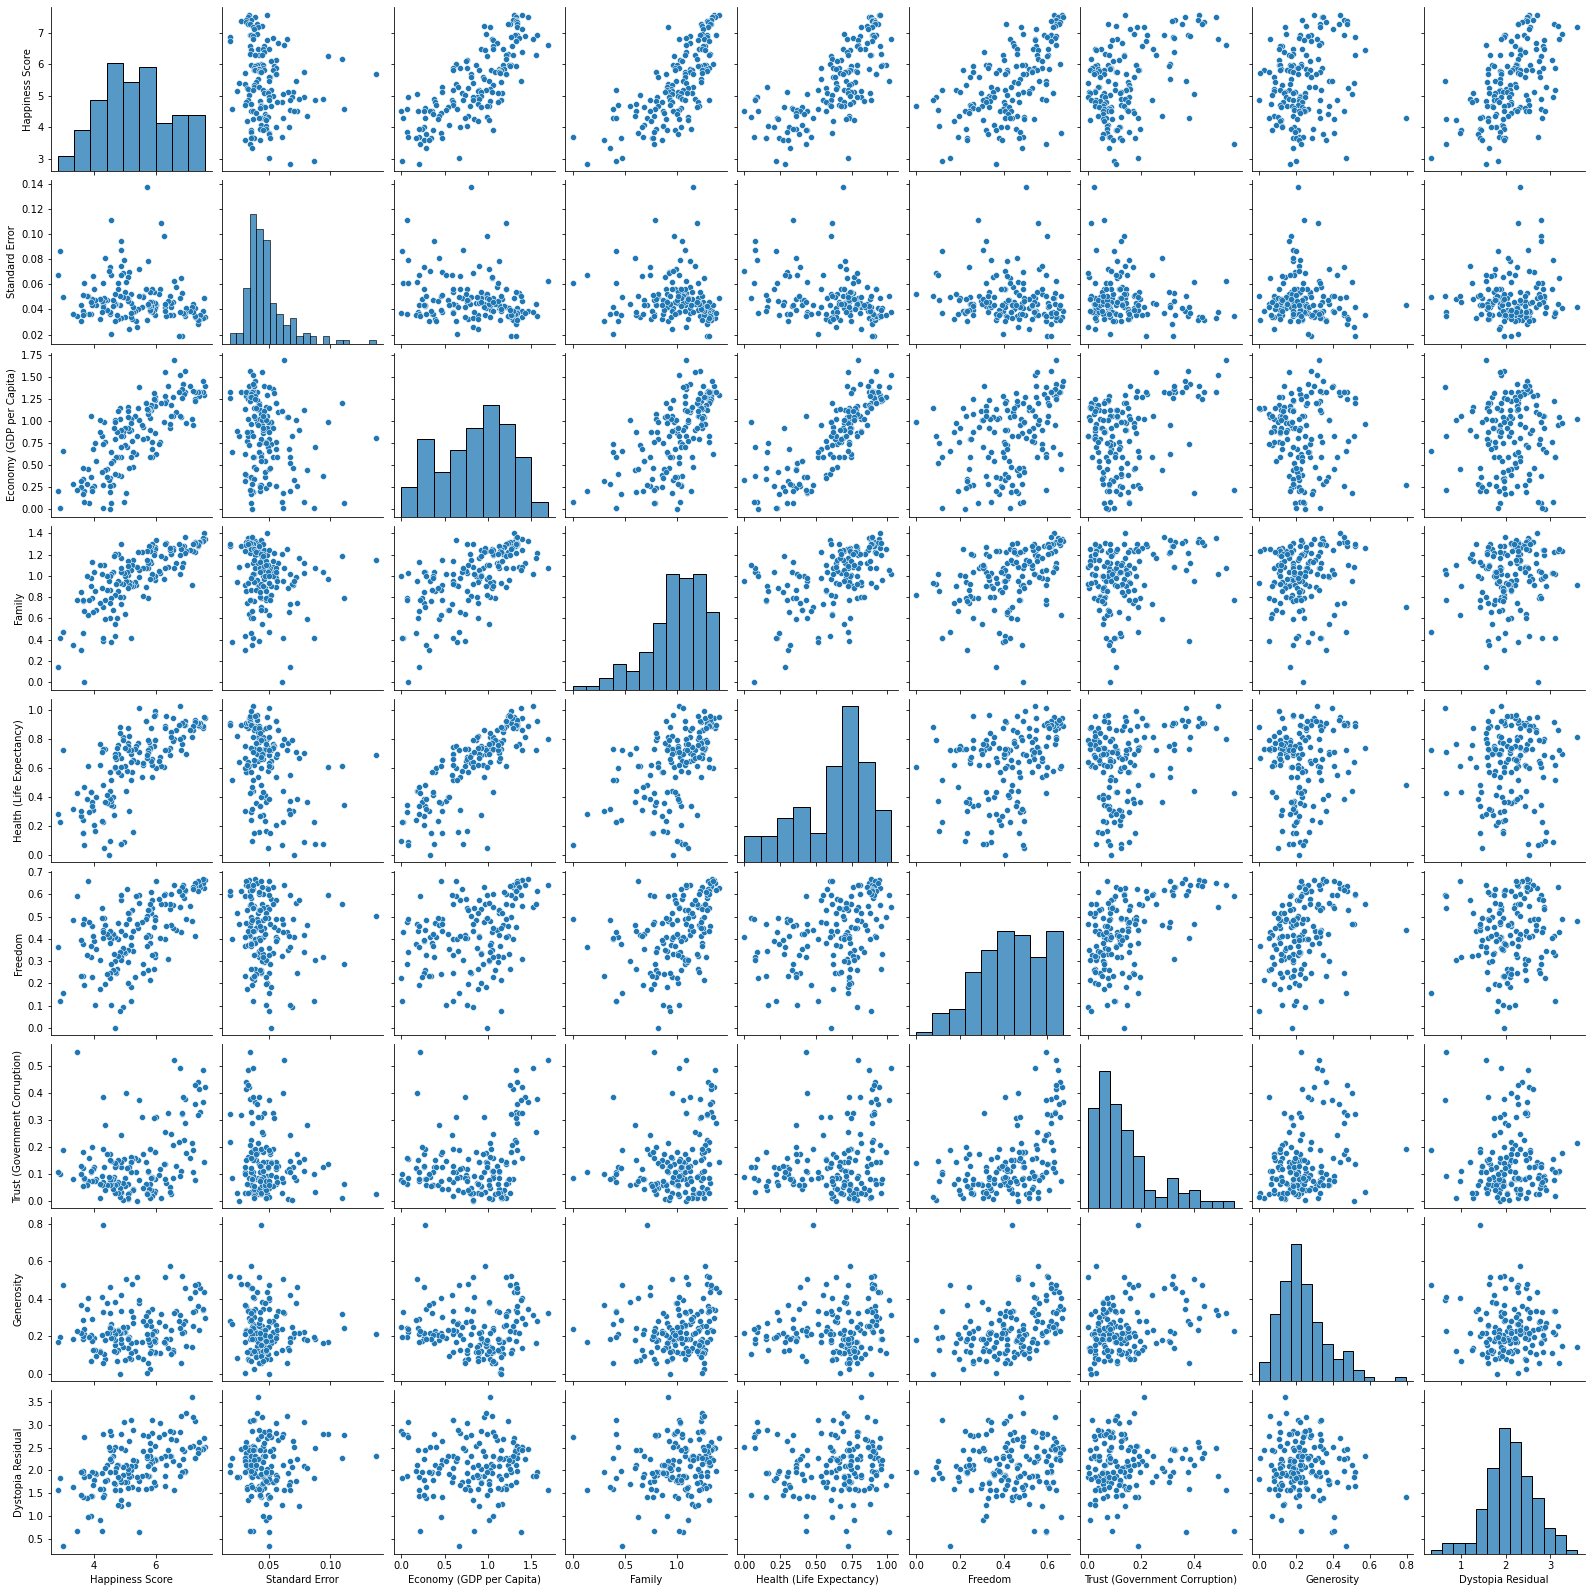

In [81]:
#Using the PairPlot:
sns.pairplot(df_score_New)
plt.show()

In pairplot we can see how datas are distributed by using scatter Plot and histogram . 

# Using Histogram:
    

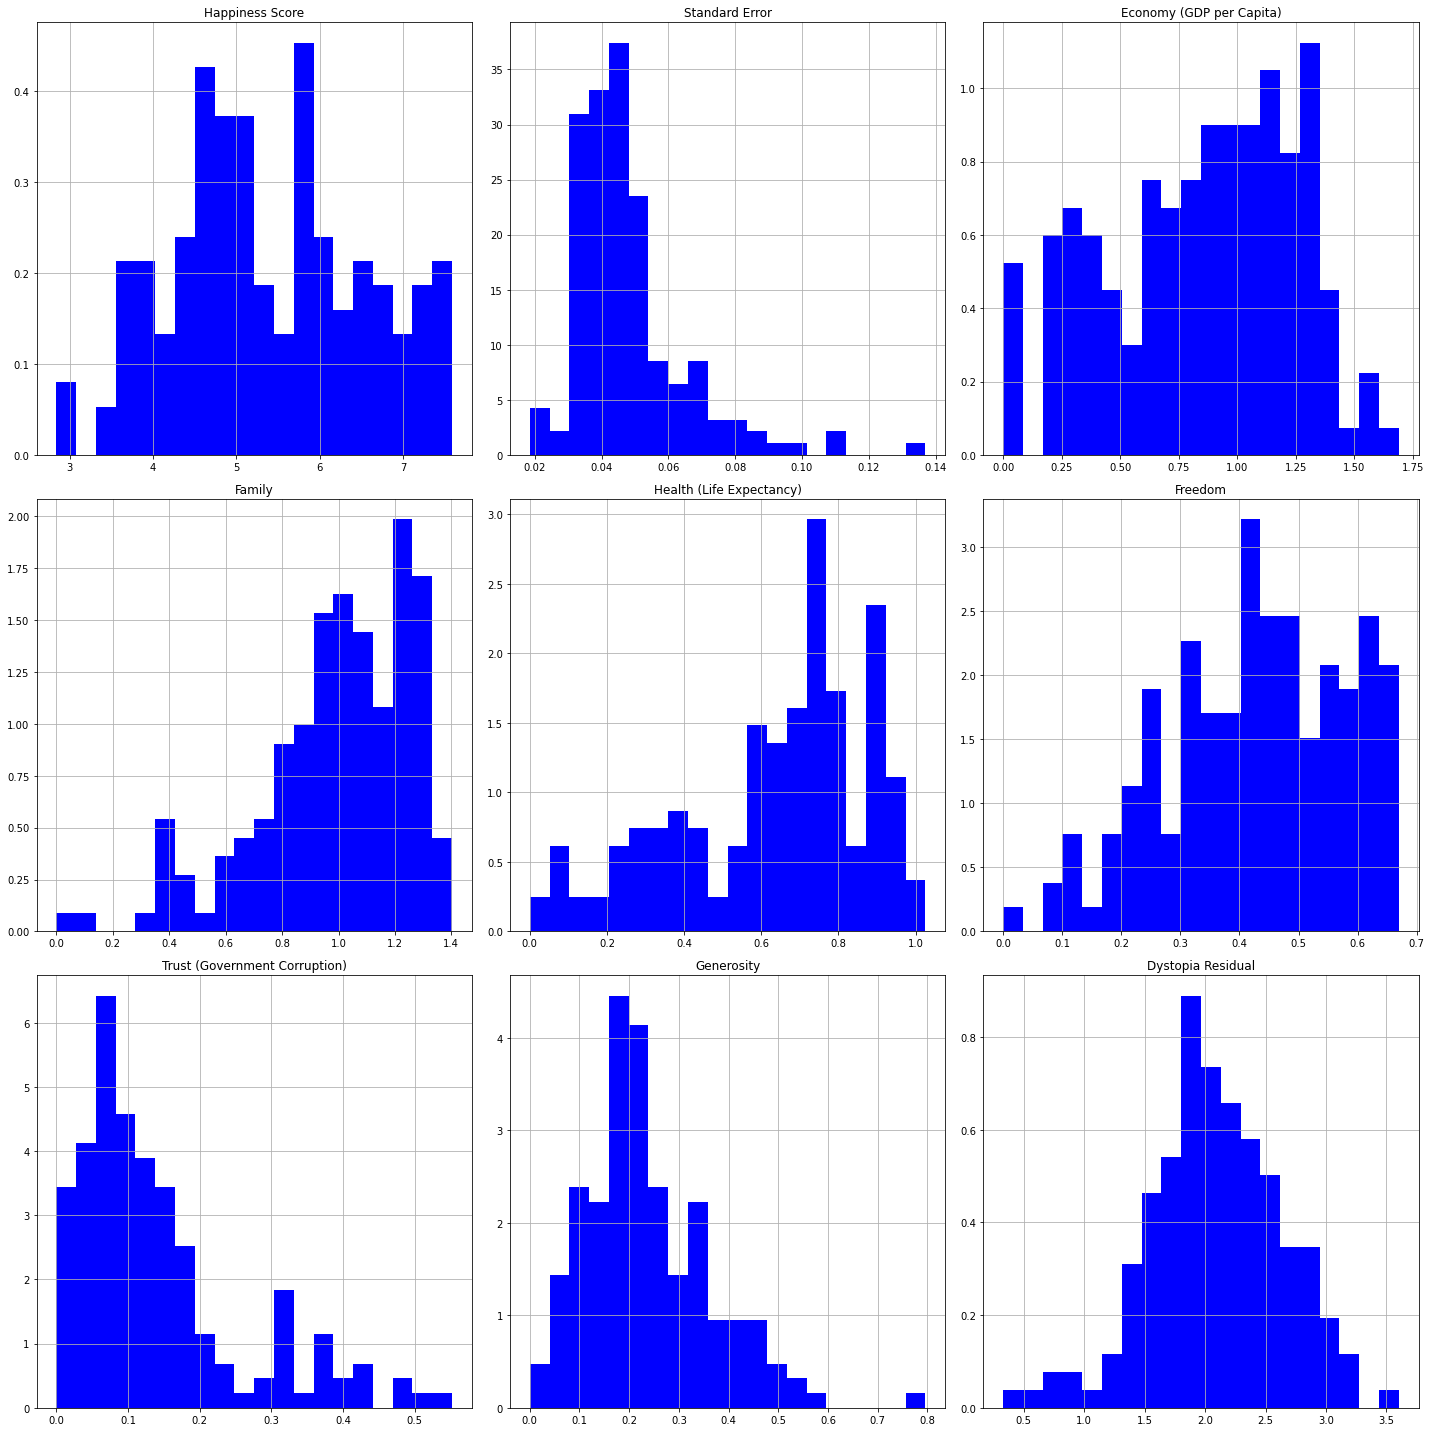

In [82]:
plt.rcParams['figure.figsize']=(20,20)
df_score_New.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

From the Histogram we can see that there are columns wuth skewness and not normally distributed. We can future conform the presense of skewness by using box plot and skew().

# Box Ploting:

Happiness Score                     AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Standard Error                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Economy (GDP per Capita)         AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Family                           AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Health (Life Expectancy)         AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Freedom                          AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Trust (Government Corruption)    AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Generosity                          AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Dystopia Residual                AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
dtype: object

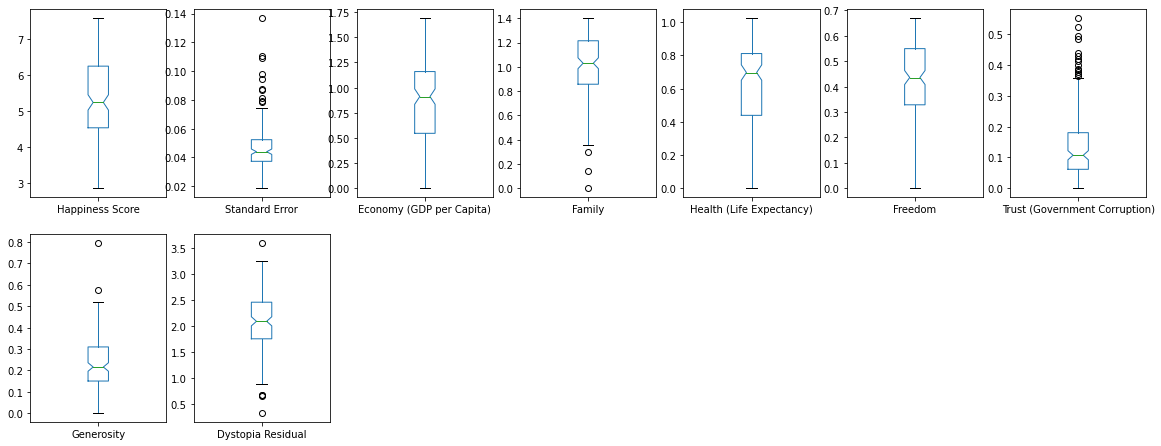

In [83]:
df_score_New.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20),notch=True)

We can clearly find out that in the coloumns like Standard Error,Trust,Family,Generosity,Dystopia Residual we can see skewness is present.

# Finding Skewness by using skew()

In [84]:
df_score_New.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

from the skew() method we can see certain columns that are not in the acceptable range of -0.5 to 0.5. that indicates that we have outliers present in our ata set will need to be treated.

# Outilier removal:
Acceptable range of Skewness: -0.5/+0,5

In [85]:
# z Score Method:
z=np.abs(zscore(df_score_New))
threshold=3
np.where(z>3)
df_score_New1=df_score_New[(z<3).all(axis=1)]
df_score_New1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


With the ZScore Method we are able to detect the outliers and have removed them from our data set

In [86]:
# Percentage of Data Loss:
data_loss=(158-149)/158*100
data_loss

5.69620253164557

# Splitting the dataset into 2 variables namely 'x','y' for feature and label

In [87]:
x=df_score_New1.drop('Happiness Score',axis=1)# list of all Feature
y=df_score_New1['Happiness Score'] # Label

Now we have spillet the dataset into features and label for Training and testing the model

In [88]:
x.shape

(149, 8)

In [89]:
y.shape

(149,)

In [90]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [91]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# Scaling

In [92]:
scale1=PowerTransformer(method='yeo-johnson')
x_scaled=pd.DataFrame(scale1.fit_transform(x),columns=x.columns)

In [93]:
x_scaled

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


Displaying all the datas after applying the Power Transformer scaler

In [94]:
#Creating the Training and Testing data sets:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75, random_state=42, shuffle=True)

We are taking 75% of the total data present in the dataset for training prupose and the remaining 25% will be used in testing purpose

# # Machine Learning Model for Regression:

In [95]:
# Model Selection:
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features="sqrt")
knr_model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')

We have used 5 regression algorithm namely  linear regression, support vector regression, decision tree regressor, random forest regressor and k neighbors regressor. Used the sklearn page to use the correct parameters for each of the models.

In [96]:
# Training the Models:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [97]:
#Prediction:
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

Once the model are trained we are predicting the label by providing the unseen test feautures and storing the values ina predicted variable

## Evaluation Metrics

In [98]:
se_linaer=mean_squared_error(y_test,pred_linear)
se_svr=mean_squared_error(y_test,pred_svr)
se_dtr=mean_squared_error(y_test,pred_dtr)
se_rfr=mean_squared_error(y_test,pred_rfr)
se_knr=mean_squared_error(y_test,pred_knr)

rmse_linear=sqrt(se_linaer)
rmse_svr=sqrt(se_svr)
rmse_dtr=sqrt(se_dtr)
rmse_rfr=sqrt(se_rfr)
rmse_knr=sqrt(se_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.06638458610380152
RMSE of Support Vector Regression is:  0.43020959342150195
RMSE of Decision Tree Regressor is:  0.6827919656974976
RMSE of Random Forest Regressor is:  0.6529441211126855
RMSE of K Neighbors Regressor is:  0.34579756208997253


I have used Root mean Squared error to check the difference between the actual label and the predicted label.It is always better to have Lower RMSE than a higher one.

In [99]:
#R2 Score for the model:

print(f"R2 Score for Linear Regression is:",r2_score(y_test,pred_linear,multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is:",r2_score(y_test,pred_svr,multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor  is:",r2_score(y_test,pred_dtr,multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor  is:",r2_score(y_test,pred_rfr,multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor  is:",r2_score(y_test,pred_knr,multioutput='variance_weighted')*100)

R2 Score for Linear Regression is: 99.61289492395045
R2 Score for Support Vector Regression is: 83.74247075798078
R2 Score for Decision Tree Regressor  is: 59.04837243238613
R2 Score for Random Forest Regressor  is: 62.55046802558333
R2 Score for K Neighbors Regressor  is: 89.49639897867345


We use R2 score to evaluate the model and check the accuracy by which we would be able to chosse our best regression model.

By comparing the RMSE and R2 score among all the 5 Regression algorithm we can see that Linear Regresson Model has higgest R2 score and Lowest RMSE which indicates that Linear Regression model is the best among all.

In [100]:
#Hyper Parameter Tuning on the best ML Model:
Lr_Param={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}
    

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
GSCV=GridSearchCV(LinearRegression(),Lr_Param,cv=5)

In [103]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False]})

In [104]:
GSCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [105]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1, normalize=True)
CLassifer=Final_model.fit(x_train,y_train)
lr_pred=Final_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)


R2 score for the Final Model is: 99.61289492395045


# Saving the Model(using pickle or joblib):

In [106]:
filename='FinalModel_Happiness.pkl'
pickle.dump(Final_model,open(fileame,'wb'))

We have saved  our final model with the help of pickle method.

# Loading The Model:

In [107]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)*100
print(result)

99.61289492395045


Finally I have loaded the saved model and passed the unseen data set to predict the model score.

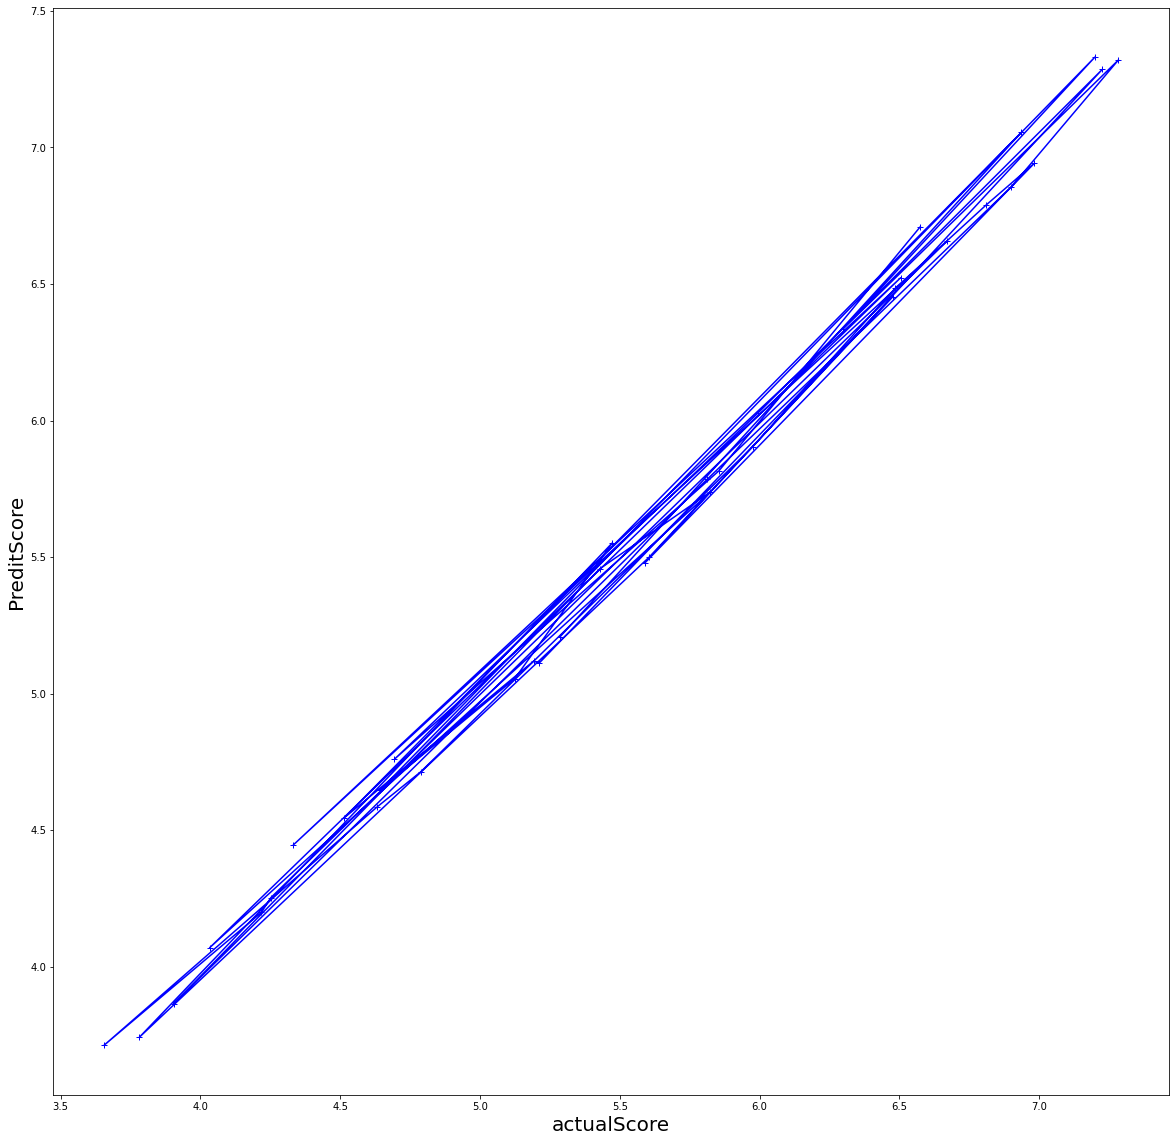

In [108]:
plt.xlabel('actualScore',fontsize=20)
plt.ylabel('PreditScore',fontsize=20)
plt.plot(y_test,lr_pred,color='blue',marker='+')
plt.show()